# Loading Library

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for legend handle
import seaborn as sns

# Read Datasets

In [47]:
data = pd.read_csv("shots_data.csv")
data.head()

,team,x,y,fgmade
0,Team A,-23.1,3.5,0
1,Team A,0.0,25.1,1
2,Team A,0.5,1.0,1
3,Team A,-5.6,5.2,0
4,Team A,4.0,14.5,1


In [48]:
data["team"].value_counts()

Team B    280
Team A    280
Name: team, dtype: int64

# Plot the Whole Dataset

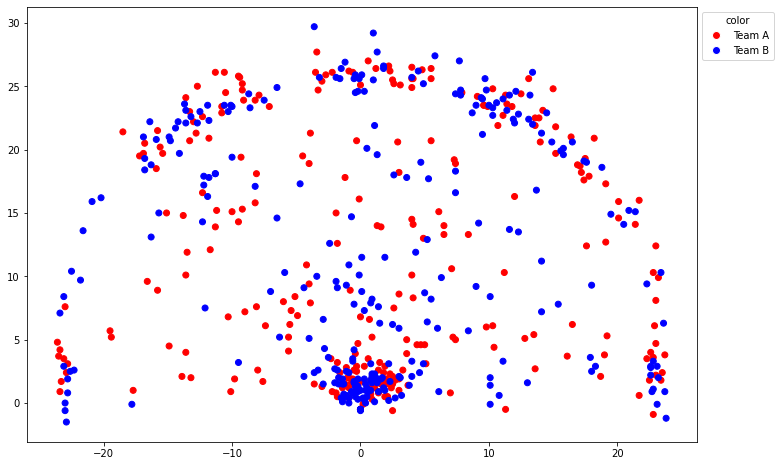

In [49]:
plt.figure(figsize = (12,8))
colors = {'Team A' : 'red', 'Team B' : 'blue'}
plt.scatter(data['x'], data['y'], c=data['team'].map(colors), label = data.team)
# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='color', handles=handles, bbox_to_anchor=(1, 1), loc='upper left')


# Define the Distance Function

In [50]:
def Distance(x,y):
    D = np.sqrt(x**2+y**2)
    return D

In [51]:
# Calculate Didtance between x and y column
data['distance'] = Distance(data.x, data.y)
data

,team,x,y,fgmade,distance
0,Team A,-23.1,3.5,0,23.363647
1,Team A,0.0,25.1,1,25.100000
2,Team A,0.5,1.0,1,1.118034
3,Team A,-5.6,5.2,0,7.641989
4,Team A,4.0,14.5,1,15.041609
...,...,...,...,...,...
555,Team B,7.8,24.7,0,25.902316
556,Team B,10.1,1.4,1,10.196568
557,Team B,-17.8,-0.1,0,17.800281
558,Team B,22.6,2.9,0,22.785302


# Locating 2PT, NC3, C3 Zones

In [52]:
corner2_1 = data[(abs(data.x)<=22) & (data.y<=7.8)]
print(corner2_1.shape)
corner2_1

(229, 5)


,team,x,y,fgmade,distance
2,Team A,0.5,1.0,1,1.118034
3,Team A,-5.6,5.2,0,7.641989
5,Team A,-13.6,4.0,1,14.176036
6,Team A,-9.0,7.2,1,11.525624
7,Team A,-1.2,1.5,1,1.920937
...,...,...,...,...,...
550,Team B,11.1,3.3,1,11.580155
551,Team B,8.4,5.7,0,10.151355
553,Team B,1.1,2.3,1,2.549510
556,Team B,10.1,1.4,1,10.196568


In [53]:
corner2_2 = data[(abs(data.x)<=22) & (data.y >7.8) & (data.y<=8.947)]
print(corner2_2.shape)
corner2_2

(14, 5)


,team,x,y,fgmade,distance
35,Team A,-5.1,8.4,0,9.827004
36,Team A,4.1,8.3,0,9.257429
148,Team A,-15.8,8.9,1,18.134222
161,Team A,-3.9,7.9,0,8.810221
175,Team A,-0.8,8.9,1,8.935883
213,Team A,3.0,8.6,0,9.108238
243,Team A,-6.0,8.0,1,10.000000
308,Team B,5.5,8.2,0,9.873702
321,Team B,5.0,8.7,0,10.034441
347,Team B,0.1,8.8,0,8.800568


In [54]:
corner2_3 = data[(data.y>8.947) & (Distance(data.x,data.y)<=23.75)]
print(corner2_3.shape)
corner2_3

(90, 5)


,team,x,y,fgmade,distance
4,Team A,4.0,14.5,1,15.041609
8,Team A,-9.2,15.3,0,17.853011
14,Team A,11.2,10.3,0,15.216110
16,Team A,-13.6,10.1,1,16.940189
34,Team A,-11.7,12.1,0,16.831518
...,...,...,...,...,...
521,Team B,11.6,13.7,0,17.951323
532,Team B,4.7,19.0,0,19.572685
542,Team B,1.1,21.9,0,21.927608
543,Team B,-6.5,14.6,1,15.981552


# 2PT Zone

In [55]:
non_corner2 = pd.concat([corner2_1, corner2_2, corner2_3])
print(non_corner2.shape)

(333, 5)


# Plotting 2PT Zone

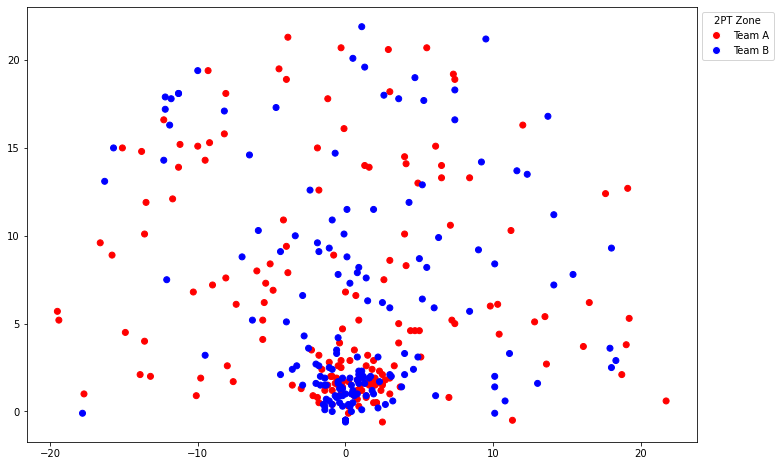

In [56]:
plt.figure(figsize = (12,8))
colors = {'Team A' : 'red', 'Team B' : 'blue'}
plt.scatter(non_corner2['x'], non_corner2['y'], c=non_corner2['team'].map(colors), label = non_corner2.team)
# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='2PT Zone', handles=handles, bbox_to_anchor=(1, 1), loc='upper left')

# NC3 Zone

In [57]:
non_corner3_1 = data[(abs(data.x)>22) & (data.y>7.8) & (data.y<=8.947)]
print(non_corner3_1.shape)
non_corner3_1

(2, 5)


,team,x,y,fgmade,distance
89,Team A,23.0,8.1,1,24.384626
303,Team B,-23.1,8.4,1,24.579870


In [58]:
non_corner3_2 = data[(Distance(data.x,data.y)>23.75) & (data.y>8.947) ]
print(non_corner3_2.shape)
non_corner3_2

(184, 5)


,team,x,y,fgmade,distance
1,Team A,0.0,25.1,1,25.100000
9,Team A,-16.8,20.5,1,26.504528
17,Team A,15.2,19.7,1,24.882323
18,Team A,2.3,26.2,0,26.300760
21,Team A,-16.9,19.7,0,25.955732
...,...,...,...,...,...
541,Team B,-10.3,23.0,0,25.200992
545,Team B,14.1,21.3,0,25.544080
552,Team B,10.3,22.7,1,24.927495
554,Team B,20.5,14.1,0,24.880916


In [59]:
non_corner3 = pd.concat([non_corner3_1, non_corner3_2])
print(non_corner3.shape)

(186, 5)


# Plotting NC3 Zone

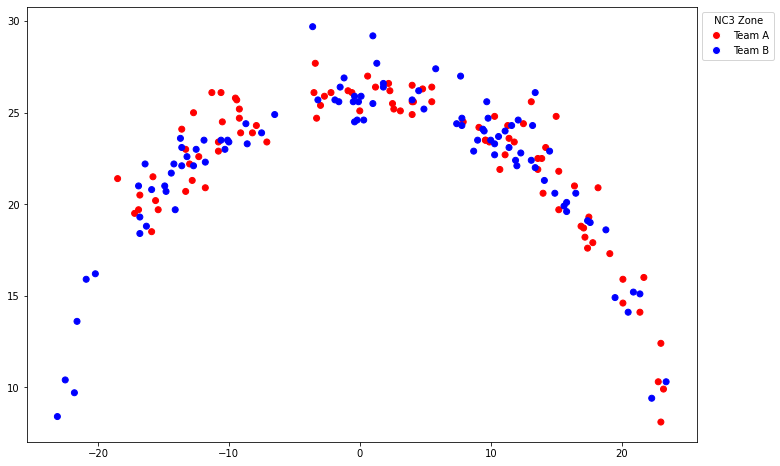

In [60]:
plt.figure(figsize = (12,8))
colors = {'Team A' : 'red', 'Team B' : 'blue'}
plt.scatter(non_corner3['x'], non_corner3['y'], c=non_corner3['team'].map(colors), label = non_corner3.team)
# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title=' NC3 Zone', handles=handles, bbox_to_anchor=(1, 1), loc='upper left')

# C3 Zone

In [61]:
corner3 = data[(abs(data.x)>22) & (data.y<=7.8)]
print(corner3.shape)
corner3

(41, 5)


,team,x,y,fgmade,distance
0,Team A,-23.1,3.5,0,23.363647
11,Team A,22.3,3.5,0,22.572993
22,Team A,22.5,1.8,1,22.571885
24,Team A,23.5,2.4,0,23.622235
92,Team A,22.8,3.6,1,23.082461
96,Team A,-22.9,2.4,0,23.025421
171,Team A,22.6,4.0,0,22.951253
185,Team A,23.0,2.2,0,23.104978
205,Team A,-23.4,0.9,1,23.417301
223,Team A,22.9,6.1,1,23.698523


# Plotting C3 Zone

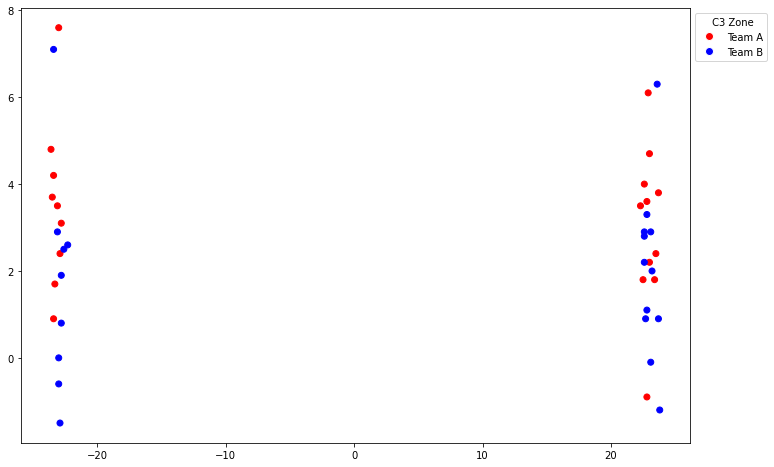

In [62]:
plt.figure(figsize = (12,8))
colors = {'Team A' : 'red', 'Team B' : 'blue'}
plt.scatter(corner3['x'], corner3['y'], c=corner3['team'].map(colors), label = corner3.team)
# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title=' C3 Zone', handles=handles, bbox_to_anchor=(1, 1), loc='upper left')

# Calculate % of Team  Shots attempted in each Zone

In [63]:
non_corner2["team"].value_counts()

Team A    170
Team B    163
Name: team, dtype: int64

In [64]:
print(" Team A percentage shot in 2PT zone: ", 170/333.0)
print(" Team B percentage shot in 2PT zone: ", 163/333.0)

 Team A percentage shot in 2PT zone:  0.5105105105105106
 Team B percentage shot in 2PT zone:  0.4894894894894895


In [65]:
non_corner3["team"].value_counts()

Team B    96
Team A    90
Name: team, dtype: int64

In [66]:
print(" Team A percentage shot in NC3 zone: ", 90/186.0)
print(" Team B percentage shot in NC3 zone: ", 96/186.0)

 Team A percentage shot in NC3 zone:  0.4838709677419355
 Team B percentage shot in NC3 zone:  0.5161290322580645


In [67]:
corner3["team"].value_counts()

Team B    21
Team A    20
Name: team, dtype: int64

In [68]:
print(" Team A percentage shot in C3 zone: ", 20/41.0)
print(" Team B percentage shot in C3 zone: ", 21/41.0)

 Team A percentage shot in C3 zone:  0.4878048780487805
 Team B percentage shot in C3 zone:  0.5121951219512195


# Calculate eFG% for each Team in 3 Zones: 

# 2PT Zone

In [69]:
teamA_made_2PT = non_corner2[(non_corner2['team'] == 'Team A') & (non_corner2['fgmade'] == 1) ]
teamA_made_2PT.shape[0]

68

In [70]:
teamB_made_2PT = non_corner2[(non_corner2['team'] == 'Team B') & (non_corner2['fgmade'] == 1) ]
teamB_made_2PT.shape[0]

75

Text(0.5, 1.0, ' 2PT zone')

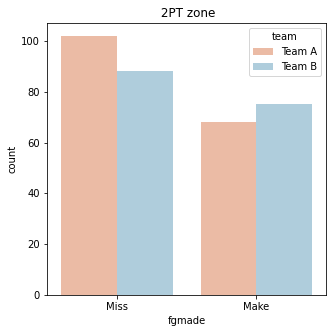

In [71]:
plt.figure(figsize=(5, 5))
sns.countplot(x='fgmade', hue='team', data=non_corner2, palette='RdBu')
plt.xticks([0, 1], ['Miss', 'Make'])
plt.title(" 2PT zone")

In [72]:
# eFG%  for 2PT zone
TeamA = 68/170.
TeamB = 75/163.
print("Team A eFG% in 2PT: ", TeamA)
print("Team B eFG% in 2PT: ", TeamB)

Team A eFG% in 2PT:  0.4
Team B eFG% in 2PT:  0.4601226993865031


# NC3 Zone

In [73]:
teamA_made_NC3 = non_corner3[(non_corner3['team'] == 'Team A') & (non_corner3['fgmade'] == 1) ]
teamA_made_NC3.shape[0]

29

In [74]:
teamB_made_NC3 = non_corner3[(non_corner3['team'] == 'Team B') & (non_corner3['fgmade'] == 1) ]
teamB_made_NC3.shape[0]

35

Text(0.5, 1.0, ' NC3  Zone')

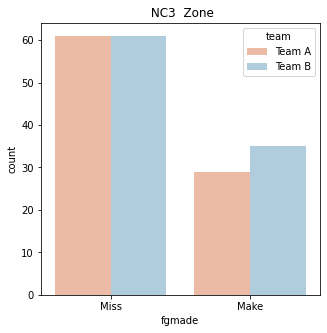

In [75]:
plt.figure(figsize=(5, 5))
sns.countplot(x='fgmade', hue='team', data=non_corner3, palette='RdBu')
plt.xticks([0, 1], ['Miss', 'Make'])
plt.title(" NC3  Zone")

In [76]:
# eFG%  for NC3 zone
TeamA = 1.5*29/90.
TeamB = 1.5*35/96.
print("Team A eFG% in NC3: ", TeamA)
print("Team B eFG% in NC3: ", TeamB)

Team A eFG% in NC3:  0.48333333333333334
Team B eFG% in NC3:  0.546875


# C3 Zone

In [77]:
teamA_made_C3 = corner3[(corner3['team'] == 'Team A') & (corner3['fgmade'] == 1) ]
teamA_made_C3.shape[0]

8

In [78]:
teamB_made_C3 = corner3[(corner3['team'] == 'Team B') & (corner3['fgmade'] == 1) ]
teamB_made_C3.shape[0]

5

Text(0.5, 1.0, ' C3 Zone')

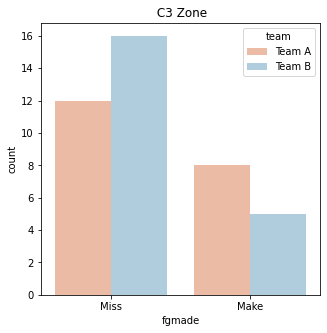

In [79]:
plt.figure(figsize=(5, 5))
sns.countplot(x='fgmade', hue='team', data=corner3, palette='RdBu')
plt.xticks([0, 1], ['Miss', 'Make'])
plt.title(" C3 Zone")

In [80]:
# eFG%  for C3 zone
TeamA = 1.5*8/20.
TeamB = 1.5*5/21.
print("Team A eFG% in C3: ", TeamA)
print("Team B eFG% in C3: ", TeamB)

Team A eFG% in C3:  0.6
Team B eFG% in C3:  0.35714285714285715
